In [14]:
import numpy as np
import csv as csv
from scipy import stats
from matplotlib import pyplot 
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [15]:
csvfile = open('/Users/adityav/Downloads/Fitness Planner - Weight Tracking.csv', 'r', newline='')

In [16]:
reader = csv.reader(csvfile)
header = next(reader)

In [17]:
data = [] 
for row in reader: 
    data.append([ float(x) for x in row[0:2] ])

data = np.array(data)

In [18]:
m = np.size(data[0::, 0]) # no. of training examples
print('# training examples = %d'%m)
# make mx2 matrix for x values 
x = np.reshape(data[0::, 0], (m,1))
y = np.reshape(data[0::, 1], (m,1))
# add extra column of 1s to x
b = np.ones((m,2))
b[0::,1:] = x
x = b
#print(x)

# training examples = 40


In [19]:
# get hypothesis
def get_hypothesis(x, theta):
    return np.dot(x, theta)

In [20]:
# initialize theta
theta = np.zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

In [21]:
def compute_cost(theta):
    # get predictions
    h = get_hypothesis(x, theta)
    sq_error = (h - y)**2
    mean_sq_error = (np.sum(sq_error))/(2*m)
    return mean_sq_error

In [22]:
it = 0
J_history = np.zeros((iterations,1))
while it < iterations:
    h = get_hypothesis(x, theta)
    #print(h)
    v = np.reshape(x[:,0], (m,1))
    j1 = np.sum((h - y)*v)/m
    v = np.reshape(x[:,1], (m,1))
    j2 = np.sum((h - y)*v)/m
    #print(j1, j2)
    theta[0] = theta[0] - alpha*j1
    theta[1] = theta[1] - alpha*j2
    #print(theta)
    J_history[it] = compute_cost(theta)
    if (it != 0):
        if (J_history[it] > J_history[it-1]): # cost is increasing, decrease learning rate
            alpha /= 2
        else:
            alpha *= 2
            
    #print(J_history[it])
    it +=1

print(theta)

[[ 0.00623804]
 [ 1.00082785]]


In [23]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(data[0::, 0] , data[0::, 1])

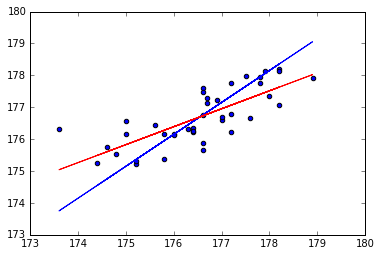

In [24]:
#Plot the data
pyplot.scatter(data[0::, 0], data[0::, 1], marker='o', c='b')


#title('Profits distribution')
#xlabel('Population of City in 10,000s')
#ylabel('Profit in $10,000s')
pyplot.plot(data[0::, 0], data[0::, 0]*theta[1] + theta[0], color="blue")
pyplot.plot(data[0::, 0], data[0::, 0]*slope + intercept, color="red")
pyplot.show()
